# Simple LR

In [ ]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/1.01. Simple linear regression.csv')
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [ ]:
df.shape

(84, 2)

In [ ]:
x = df['SAT']
x.shape

(84,)

In [ ]:
y = df['GPA']
y.shape

(84,)

In [ ]:
x_fit = x.values.reshape(-1, 1)
x_fit.shape

(84, 1)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_fit, y)

LinearRegression()

In [ ]:
reg.score(x_fit, y)

0.40600391479679754

In [ ]:
reg.coef_

array([0.00165569])

In [ ]:
reg.intercept_

0.2750402996602799

In [ ]:
reg.predict([[1740]])

array([3.15593751])

In [ ]:
n_d = pd.DataFrame(data = [1740, 1666], columns = ['SAT'])
n_d

,SAT
0,1740
1,1666


In [ ]:
reg.predict(n_d)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.03341659])

In [ ]:
n_d["Predicted_GPA"] = reg.predict(n_d)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
n_d

,SAT,Predicted_GPA
0,1740,3.155938
1,1666,3.033417


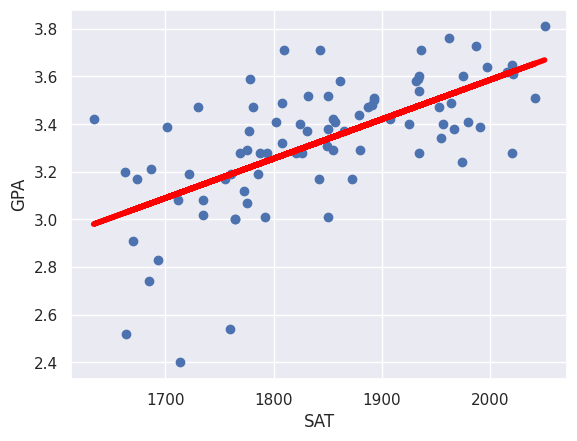

In [ ]:
plt.scatter(x,y)
yhat = reg.coef_*x + reg.intercept_
fig = plt.plot(x, yhat,lw=4, c='red', label='Regression Line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

# Multiple LR

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/1.02. Multiple linear regression.csv')
df.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [ ]:
df.describe()

,SAT,"Rand 1,2,3",GPA
count,84.000000,84.000000,84.000000
mean,1845.273810,2.059524,3.330238
std,104.530661,0.855192,0.271617
min,1634.000000,1.000000,2.400000
25%,1772.000000,1.000000,3.190000
50%,1846.000000,2.000000,3.380000
75%,1934.000000,3.000000,3.502500
max,2050.000000,3.000000,3.810000


In [ ]:
x = df[['SAT', 'Rand 1,2,3']]
x.shape

(84, 2)

In [ ]:
y = df['GPA']
y.shape

(84,)

In [ ]:
reg = LinearRegression()

In [ ]:
print(reg.fit(x,y))

LinearRegression()


In [ ]:
reg.coef_

array([ 0.00165354, -0.00826982])

In [ ]:
reg.intercept_

0.29603261264909486

###$R^2$

In [ ]:
reg.score(x,y)

0.4066811952814283

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [ ]:
def adj_r2(x,y):
  r2 = reg.score(x, y)
  n = x.shape[0]
  p = x.shape[1]
  return 1-(1-r2) * (n-1)/(n-p-1)

In [ ]:
print(adj_r2(x, y))

0.3920313482513401


### Feature Selection

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_regression(x, y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

In [ ]:
p_values = f_regression(x,y)[1]
p_values

array([7.19951844e-11, 6.76291372e-01])

In [ ]:
p_values.round(3)

array([0.   , 0.676])

In [ ]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [ ]:
reg_summary["Coefficients"] = reg.coef_
reg_summary['P-values'] = p_values.round(3)

In [ ]:
reg_summary

,Features,Coefficients,P-values
0,SAT,0.001654,0.000
1,"Rand 1,2,3",-0.008270,0.676


# Exercise

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [ ]:
df = pd.read_csv('/content/real_estate_price_size_year.csv')
df.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


In [ ]:
x = df[['size', 'year']]
x.shape

(100, 2)

In [ ]:
y = df['price']
y.shape

(100,)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x, y)

LinearRegression()

In [ ]:
reg.intercept_

-5772267.017463279

In [ ]:
reg.coef_

array([ 227.70085401, 2916.78532684])

In [ ]:
reg.score(x,y)

0.7764803683276795

### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$

In [ ]:
def adj_r2(x,y):
  r2 = reg.score(x, y)
  n = x.shape[0]
  p = x.shape[1]
  return 1-(1-r2) * (n-1)/(n-p-1)

In [ ]:
print(adj_r2(x, y))

0.7718717161282502


### Feature Selection

In [ ]:
f_regression(x, y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [ ]:
p_values = f_regression(x,y)[1]
p_values

array([8.12763222e-31, 3.57340758e-01])

In [ ]:
p_values.round(3)

array([0.   , 0.357])

In [ ]:
reg_summary = pd.DataFrame(data = x.columns.values, columns = ['Features'])
reg_summary

,Features
0,size
1,year


In [ ]:
reg_summary["Coefficients"] = reg.coef_
reg_summary['P-values'] = p_values.round(3)

In [ ]:
reg_summary

,Features,Coefficients,P-values
0,size,227.700854,0.000
1,year,2916.785327,0.357


### Remove Year Feature

In [ ]:
x = df[['size']]
x.shape

(100, 1)

In [ ]:
y = df['price']
y.shape

(100,)

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x, y)

LinearRegression()

In [ ]:
reg.score(x,y)

0.7447391865847586

In [ ]:
print(adj_r2(x, y))

0.742134484407052


In [ ]:
f_regression(x, y)

(array([285.92105192]), array([8.12763222e-31]))

In [ ]:
np.round(f_regression(x,y)[1], 3)

array([0.])

#standardization

In [ ]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [ ]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.02. Multiple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,"Rand 1,2,3",GPA
0,1714,1,2.40
1,1664,3,2.52
2,1760,3,2.54
3,1685,3,2.74
4,1693,2,2.83


In [ ]:
# There are two independent variables: 'SAT' and 'Rand 1,2,3'
x = data[['SAT','Rand 1,2,3']]

# and a single dependent variable: 'GPA'
y = data['GPA']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x)

StandardScaler()

In [ ]:
x_scaled = scaler.transform(x)

In [ ]:
# Creating a regression works in the exact same way
reg = LinearRegression()

# We just need to specify that our inputs are the 'scaled inputs'
reg.fit(x_scaled,y)

LinearRegression()

In [ ]:
# Let's see the coefficients
reg.coef_

array([ 0.17181389, -0.00703007])

In [ ]:
# And the intercept
reg.intercept_

3.330238095238095

In [ ]:
# As usual we can try to arrange the information in a summary table
# Let's create a new data frame with the names of the features
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns=['Features'])

# Then we create and fill a second column, called 'Weights' with the coefficients of the regression
# Since the standardized coefficients are called 'weights' in ML, this is a much better word choice for our case
# Note that even non-standardized coeff. are called 'weights'
# but more often than not, when doing ML we perform some sort of scaling
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [ ]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


In [ ]:
# For simplicity, let's crete a new dataframe with 2 *new* observations
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],columns=['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [ ]:
reg.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([295.39979563, 312.58821497])

In [ ]:
# Our model is expecting SCALED features (features of different magnitude)
# In fact we must transform the 'new data' in the same way as we transformed the inputs we train the model on
# Luckily for us, this information is contained in the 'scaler' object
# We simply transform the 'new data' using the relevant method
new_data_scaled = scaler.transform(new_data)

# Let's check the result
new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [ ]:
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

In [ ]:
# Theory suggests that features with very small weights could be removed and the results should be identical
# Moreover, we proved in 2-3 different ways that 'Rand 1,2,3' is an irrelevant feature
# Let's create a simple linear regression (simple, because there is a single feature) without 'Rand 1,2,3'
reg_simple = LinearRegression()

# Once more, we must reshape the inputs into a matrix, otherwise we will get a compatibility error
# Note that instead of standardizing again, I'll simply take only the first column of x
x_simple_matrix = x_scaled[:,0].reshape(-1,1)

# Finally, we fit the regression
reg_simple.fit(x_simple_matrix,y)

LinearRegression()

In [ ]:
# In a similar manner to the cell before, we can predict only the first column of the scaled 'new data'
# Note that we also reshape it to be exactly the same as x
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])